In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("women_reviews_modified.csv")

### Data Cleaning

In [3]:
## removing white spaces
df['Class Name']=df['Class Name'].str.lower()
df['Class Name']=df['Class Name'].str.replace(" ","_")

df['Class Name'].value_counts()

dresses           6145
knits             4626
blouses           2983
sweaters          1380
pants             1350
jeans             1104
fine_gauge        1059
skirts             903
jackets            683
lounge             669
swim               332
outerwear          319
shorts             304
sleep              214
legwear            158
intimates          147
layering           132
trend              118
chemises             1
casual_bottoms       1
Name: Class Name, dtype: int64

In [4]:
df['Department Name']=df['Department Name'].str.lower()
df['Department Name']=df['Department Name'].replace(" ","_")
df['Department Name'].value_counts()

tops        10048
dresses      6145
bottoms      3662
intimate     1653
jackets      1002
trend         118
Name: Department Name, dtype: int64

In [5]:
df["Division Name"]=df["Division Name"].str.lower()
df["Division Name"]=df["Division Name"].str.replace(" ","_")
df["Division Name"].value_counts()

general           13365
general_petite     7837
initmates          1426
Name: Division Name, dtype: int64

In [6]:
## define a function to replace shorthand notations with long ones
import re

In [7]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [9]:
from nltk.corpus import stopwords

In [13]:
## Elimnate stop words from Review Text
stop = stopwords.words('english')
df['Review Text']=df['Review Text'].apply(lambda x:' '.join( [item for item in x.split() if item not in (stop)]))

In [14]:
### After removing stopwords
df['Review Text']

0            Absolutely wonderful - silky sexy comfortable
1        Love dress! sooo pretty. happened find store, ...
2        I high hopes dress really wanted work me. init...
3        I love, love, love jumpsuit. fun, flirty, fabu...
4        This shirt flattering due adjustable front tie...
                               ...                        
22623    I happy snag dress great price! easy slip flat...
22624    It reminds maternity clothes. soft, stretchy, ...
22625    This fit well, top see through. never would wo...
22626    I bought dress wedding summer, cute. unfortuna...
22627    This dress lovely platinum feminine fits perfe...
Name: Review Text, Length: 22628, dtype: object

In [15]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentence in tqdm(text_data):
        sent = decontracted(sentence)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [16]:
preprocessed_review=preprocess_text(df["Review Text"].values)

100%|██████████| 22628/22628 [00:00<00:00, 32897.45it/s]


In [17]:
df["Review Text"]=preprocessed_review

In [18]:
y=df["Recommended IND"]
x=df.drop(["Recommended IND"],axis=1)

In [19]:
x.head(3)

,Unnamed: 0,Age,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Class Name,polarity,review_len,word_count,Avg_word_len
0,0,33,absolutely wonderful silky sexy comfortable,4,0,initmates,intimate,intimates,0.633333,53,8,5.750000
1,1,34,love dress sooo pretty happened find store i a...,5,4,general,dresses,dresses,0.339583,303,62,3.822581
2,2,60,i high hopes dress really wanted work me initi...,3,0,general,dresses,dresses,0.073675,500,98,4.112245


In [21]:
x.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,stratify=y, random_state =41)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vec=CountVectorizer()
vec.fit(X_train["Review Text"].values)

x_train_rev=vec.transform(X_train["Review Text"].values)
x_test_rev=vec.transform(X_test["Review Text"].values)

print("after vectorization....")
print(x_train_rev.shape,y_train.shape)
print(x_test_rev.shape,y_test.shape)

after vectorization....
(15160, 11988) (15160,)
(7468, 11988) (7468,)


In [30]:
vec.fit(X_train["Division Name"].values)

x_train_div=vec.transform(X_train["Division Name"].values)
x_test_div=vec.transform(X_test["Division Name"].values)

print("after vectorization....")
print(x_train_div.shape,y_train.shape)
print(x_test_div.shape,y_test.shape)


after vectorization....
(15160, 3) (15160,)
(7468, 3) (7468,)


In [31]:
vec.fit(X_train["Department Name"].values)

x_train_dep=vec.transform(X_train["Department Name"].values)
x_test_dep=vec.transform(X_test["Department Name"].values)

print("after vectorization....")
print(x_train_dep.shape,y_train.shape)
print(x_test_dep.shape,y_test.shape)

print(vec.get_feature_names())

after vectorization....
(15160, 6) (15160,)
(7468, 6) (7468,)
['bottoms', 'dresses', 'intimate', 'jackets', 'tops', 'trend']


In [33]:
vec.fit(X_train["Class Name"].values)

x_train_cls=vec.transform(X_train["Class Name"].values)
x_test_cls=vec.transform(X_test["Class Name"].values)

print("after vectorization....")
print(x_train_cls.shape,y_train.shape)
print(x_test_cls.shape,y_test.shape)

print(vec.get_feature_names())

after vectorization....
(15160, 19) (15160,)
(7468, 19) (7468,)
['blouses', 'chemises', 'dresses', 'fine_gauge', 'intimates', 'jackets', 'jeans', 'knits', 'layering', 'legwear', 'lounge', 'outerwear', 'pants', 'shorts', 'skirts', 'sleep', 'sweaters', 'swim', 'trend']


In [34]:
X_train['Rating']

13492    5
7220     3
3678     3
22451    4
3810     4
        ..
22122    2
15809    3
11016    5
15502    4
5110     3
Name: Rating, Length: 15160, dtype: int64

In [35]:
x_train_rate=(np.array(X_train["Rating"])).reshape((-1,1))
x_test_rate=(np.array(X_test["Rating"])).reshape((-1,1))


In [36]:
## Normalize Age column
from sklearn.preprocessing import Normalizer
norm= Normalizer()

norm.fit(X_train['Age'].values.reshape(1,-1))

x_train_age=norm.transform(X_train["Age"].values.reshape(1,-1))
x_test_age=norm.transform(X_test["Age"].values.reshape(1,-1))

x_train_age=x_train_age.reshape(-1,1)
x_test_age=x_test_age.reshape(-1,1)

In [37]:
from scipy.sparse import hstack

x_tr=hstack((x_train_rev,x_train_div,x_train_dep,x_train_cls,x_train_rate,x_train_age)).tocsr()
x_te=hstack((x_test_rev,x_test_div,x_test_dep,x_test_cls,x_test_rate,x_test_age)).tocsr()

In [38]:
print("FINAL DATA MATRIX SHAPE IS ........")
print(x_tr.shape,y_train.shape)
print(x_te.shape,y_test.shape)

FINAL DATA MATRIX SHAPE IS ........
(15160, 12018) (15160,)
(7468, 12018) (7468,)


In [39]:
# below defined function imports classifier and data and returns class probabilities
def batch_pred(clf,data):
    y_data_pred=[]
    tr_loop=data.shape[0]-data.shape[0]%1000
    
    for i in range(0,tr_loop,1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
        
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

In [40]:
import math
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

100%|██████████| 9/9 [00:00<00:00, 29.04it/s]


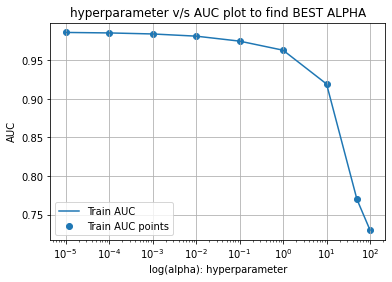

In [42]:
train_auc = []    
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,50,100]         #to find the best alpha value
for i in tqdm(alpha):
    neigh = MultinomialNB(alpha=i,class_prior=[0.5,0.5],fit_prior=False)
    neigh.fit(x_tr, y_train)

    y_train_pred = batch_pred(neigh, x_tr)    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    
plt.plot(alpha, train_auc, label='Train AUC')        #plotting hyper_parameter v/s auc value plot....
plt.xscale("log")
plt.scatter(alpha , train_auc, label='Train AUC points')

plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("hyperparameter v/s AUC plot to find BEST ALPHA")
plt.grid()
plt.show()

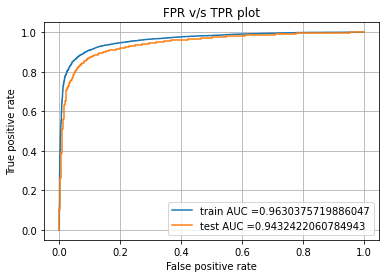

In [43]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


clas = MultinomialNB(alpha=1,class_prior=[0.5,0.5],fit_prior=False)
clas.fit(x_tr, y_train)


y_train_pred = batch_pred(clas, x_tr)    
y_test_pred = batch_pred(clas, x_te)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


train_auc=auc(train_fpr, train_tpr)
test_auc=auc(test_fpr, test_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(test_auc))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("FPR v/s TPR plot")
plt.grid()
plt.show()